In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor


In [28]:
'''
import pandas as pd

# Assuming df1 and df2 are your DataFrame objects
# Load your DataFrame objects (replace the data with your actual DataFrames)
df1 = pd.DataFrame({'County': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D'], 'Data1': ["a", "b", "c", "d", "e", "f", "g", "h"]})
df2 = pd.DataFrame({'County': ['A', 'B', 'C', 'D'], 'Data2': [1, 2, 3, 4]})

# Left join based on the "County" column
merged_df = pd.merge(df1, df2, on='County', how='left')

# Resulting DataFrame will contain all rows from df1, and matching rows from df2
# Non-matching rows in df2 will have NaN values for the new columns
print(merged_df)
'''

  County Data1  Data2
0      A     a      1
1      B     b      2
2      C     c      3
3      D     d      4
4      A     e      1
5      B     f      2
6      C     g      3
7      D     h      4


In [96]:
weather_cleaned = pd.read_csv("final_cleaned_data/weather_yield_x_normalize.csv").drop(columns=["Unnamed: 0"], axis=1)
soil_cleaned = pd.read_csv("final_cleaned_data/soil_yield_table.csv").drop(columns=["Unnamed: 0", "Value"], axis=1)

In [97]:
def columns_with_mostly_zeros(df, threshold=0.95):
    """
    Get columns where 95% or more of the values are zero.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - threshold: float, optional (default=0.95)
        The threshold percentage for determining if a column contains mostly zeros.

    Returns:
    - list
        A list of column names where 95% or more of the values are zero.
    """
    # Calculate the percentage of zeros in each column
    zero_counts = (df == 0).mean()

    # Filter columns where the percentage of zeros exceeds the threshold
    mostly_zeros_columns = zero_counts[zero_counts >= threshold].index.tolist()

    return mostly_zeros_columns

In [98]:
mostly_zeros_columns = columns_with_mostly_zeros(weather_cleaned)

In [99]:
weather_cleaned_v2 = weather_cleaned.drop(columns=mostly_zeros_columns, axis=1)

In [100]:
weather_cleaned_v3 = weather_cleaned_v2.drop(columns=["EMSD_4", "SNOW_4", "DX90_10"], axis=1)

In [102]:
soil_cleaned.columns

Index(['County', 'AWS', 'Representative_Non-Irrigated_Yield', 'cec7_l',
       'ksat_l', 'awc_l', 'ph1to1h2o_l', 'ec_l', 'ec_r', 'ec_h',
       'soil_type_Coarse-loamy, mixed, active, mesic Typic Hapludalfs',
       'soil_type_Coarse-loamy, mixed, superactive, mesic Mollic Hapludalfs',
       'soil_type_Euic, mesic Typic Haplosaprists',
       'soil_type_Fine, illitic, mesic Aeric Epiaqualfs',
       'soil_type_Fine, mixed, active, mesic Aeric Epiaqualfs',
       'soil_type_Fine, mixed, active, mesic Aquultic Hapludalfs',
       'soil_type_Fine, mixed, active, mesic Oxyaquic Hapludalfs',
       'soil_type_Fine, mixed, active, mesic Typic Hapludalfs',
       'soil_type_Fine-loamy, mixed, active, mesic Oxyaquic Argiudolls',
       'soil_type_Fine-loamy, mixed, active, mesic Oxyaquic Hapludalfs',
       'soil_type_Fine-loamy, mixed, active, mesic Typic Hapludalfs',
       'soil_type_Fine-loamy, mixed, superactive, mesic Aquic Argiudolls',
       'soil_type_Fine-silty, mixed, active, mesic

In [103]:
# Left join based on the "County" column
weather_soil_merged_df = pd.merge(weather_cleaned_v3 , soil_cleaned, on='County', how='left')

In [104]:
weather_soil_merged_df

,Year,County,DP01_4,DP01_5,DP01_6,DP01_7,DP01_8,DP01_9,DP01_10,DP10_4,...,texture_secondary_SIL,rvindicator_tex_Yes,RoadwayRelevanceSoilGrade_A-4,RoadwayRelevanceSoilGrade_A-6,HumanErosion_Sheet erosion,HumanErosion_Wind erosion,MoisterClass_Udic,Drainage_class_Somewhat poorly drained,Drainage_class_Very poorly drained,Drainage_class_Well drained
0,2002,ADAMS,11.000000,13.500000,8.500000,6.00,6.500,5.000000,6.000000,7.000000,...,0,0,0,1,1,0,0,1,0,0
1,2002,ALLEN,13.000000,14.000000,11.000000,6.00,8.000,6.000000,8.000000,7.000000,...,0,0,0,1,1,0,0,0,0,0
2,2002,BARTHOLOMEW,13.000000,13.000000,10.000000,6.00,9.000,6.000000,10.000000,11.000000,...,1,0,0,1,1,0,1,0,0,1
3,2002,BENTON,9.000000,15.000000,9.000000,8.00,9.000,9.000000,6.000000,7.000000,...,0,1,0,1,1,0,1,0,0,0
4,2002,BLACKFORD,12.000000,13.000000,8.000000,5.00,9.000,7.000000,5.000000,9.000000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,2022,WASHINGTON,14.666667,12.666667,6.333333,13.00,9.000,9.000000,3.000000,7.666667,...,1,0,0,1,1,0,1,0,0,1
1673,2022,WAYNE,16.000000,12.000000,8.000000,7.00,11.000,6.000000,6.000000,6.000000,...,0,1,0,1,0,0,1,0,0,1
1674,2022,WELLS,18.000000,13.333333,5.500000,11.25,8.250,9.000000,9.250000,7.000000,...,0,0,0,1,1,0,0,0,0,0
1675,2022,WHITE,14.000000,13.750000,6.500000,11.00,9.000,6.666667,6.000000,7.000000,...,0,1,1,0,0,1,1,1,0,0


In [105]:
# Check for empty values in any column
weather_soil_merged_df.isna().any()

Year                                      False
County                                    False
DP01_4                                    False
DP01_5                                    False
DP01_6                                    False
                                          ...  
HumanErosion_Wind erosion                 False
MoisterClass_Udic                         False
Drainage_class_Somewhat poorly drained    False
Drainage_class_Very poorly drained        False
Drainage_class_Well drained               False
Length: 107, dtype: bool

In [106]:
merged_df = weather_soil_merged_df.copy()

In [107]:
training_years = [2002, 2003, 2004, 2005, 2006, 2007,  2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019,  2021, 2022]
hold_out_years = [2008,2014, 2020]


train_rows_bool = merged_df['Year'].isin(training_years)
hold_rows_bool = merged_df['Year'].isin(hold_out_years)

train_rows = merged_df[train_rows_bool]
hold_rows = merged_df[hold_rows_bool]


## Split into training, validation and test

In [108]:
X = train_rows.drop(columns=["County", "Year", "Value"], axis=1)
y = train_rows["Value"]

X_hold= hold_rows.drop(columns=["County", "Year", "Value"], axis=1)
y_hold = hold_rows["Value"]

In [109]:
# [2002, 2003, 2004, 2005, 2006, 2007,  2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019,  2021, 2022]

print(X.shape) 
print(y.shape)


# [2008,2014, 2020]
print(X_hold.shape)
print(y_hold.shape)

(1424, 104)
(1424,)
(253, 104)
(253,)


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [116]:
X_train_weather = X_train.iloc[:, :50]
X_train_soil = X_train.iloc[:, -54:]

X_test_weather = X_test.iloc[:, :50]
X_test_soil = X_test.iloc[:, -54:]

X_hold_weather = X_hold.iloc[:, :50]
X_hold_soil = X_hold.iloc[:, -54:]

## Normalization for weather features

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [122]:
columns_mode = [
'DP01_4', 'DP01_5', 'DP01_6', 'DP01_7', 'DP01_8', 
                'DP01_9', 'DP01_10', 'DP10_4', 'DP10_5', 
                'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9', 'DP10_10',
'DT32_4', 'DT32_5', 
 'DT32_10',   'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 
                            'DX90_9',   'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 
                            
                          
                            
                            'EMXP_9', 'EMXP_10', 'PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7', 'PRCP_8', 
                'PRCP_9', 'PRCP_10'  ]


columns_mean = [
                'EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7', 'EMXT_8', 
                'EMXT_9', 'EMXT_10',  'TAVG_4', 'TAVG_5', 'TAVG_6', 'TAVG_7', 'TAVG_8', 
                'TAVG_9', 'TAVG_10' ]

In [123]:
'''
X_train_weather = X_train.iloc[:, :50]

X_test_weather = X_test.iloc[:, :50]

X_hold_weather = X_hold.iloc[:, :50]
'''

X_skewed_train = X_train_weather [columns_mode]
X_normal_train = X_train_weather [columns_mean]

X_skewed_test = X_test_weather[columns_mode]
X_normal_test = X_test_weather[columns_mean]

X_skewed_hold = X_hold_weather[columns_mode]
X_normal_hold = X_hold_weather[columns_mean]

In [124]:
# scaler

scaler = StandardScaler()
scaler.fit(X_normal_train)

StandardScaler()

In [125]:

X_normal_train_scaled = pd.DataFrame(scaler.transform(X_normal_train), columns=columns_mean)
X_normal_test_scaled = pd.DataFrame(scaler.transform(X_normal_test), columns=columns_mean)
X_normal_hold_scaled = pd.DataFrame(scaler.transform(X_normal_hold), columns=columns_mean)

In [126]:
r_scaler = RobustScaler()
r_scaler.fit(X_skewed_train)

RobustScaler()

In [127]:
X_skewed_train_scaled = pd.DataFrame(r_scaler.transform(X_skewed_train), columns=columns_mode)
X_skewed_test_scaled = pd.DataFrame(r_scaler.transform(X_skewed_test), columns=columns_mode)
X_skewed_hold_scaled = pd.DataFrame(r_scaler.transform(X_skewed_hold), columns=columns_mode)

In [128]:
# Combine them

X_train_scaled_weather = pd.concat([X_normal_train_scaled , X_skewed_train_scaled], axis=1)
X_test_scaled_weather = pd.concat([X_normal_test_scaled , X_skewed_test_scaled], axis=1)
X_hold_scaled_weather = pd.concat([X_normal_hold_scaled, X_skewed_hold_scaled], axis=1)

In [129]:
X_train_scaled_weather.shape

(1139, 50)

In [130]:
X_train_soil_reset_index = X_train_soil.reset_index(drop=True)
X_test_soil_reset_index = X_test_soil.reset_index(drop=True)
X_hold_soil_reset_index = X_hold_soil.reset_index(drop=True)

In [131]:
# Combine weather and soil

X_train_scaled = pd.concat([X_train_scaled_weather , X_train_soil_reset_index], axis=1)
X_test_scaled = pd.concat([X_test_scaled_weather , X_test_soil_reset_index], axis=1)
X_hold_scaled = pd.concat([X_hold_scaled_weather, X_hold_soil_reset_index], axis=1)

In [132]:
X_train_scaled.shape

(1139, 104)

In [133]:
for i in X_train_scaled.columns:
    print(i)

EMXT_4
EMXT_5
EMXT_6
EMXT_7
EMXT_8
EMXT_9
EMXT_10
TAVG_4
TAVG_5
TAVG_6
TAVG_7
TAVG_8
TAVG_9
TAVG_10
DP01_4
DP01_5
DP01_6
DP01_7
DP01_8
DP01_9
DP01_10
DP10_4
DP10_5
DP10_6
DP10_7
DP10_8
DP10_9
DP10_10
DT32_4
DT32_5
DT32_10
DX90_5
DX90_6
DX90_7
DX90_8
DX90_9
EMXP_4
EMXP_5
EMXP_6
EMXP_7
EMXP_8
EMXP_9
EMXP_10
PRCP_4
PRCP_5
PRCP_6
PRCP_7
PRCP_8
PRCP_9
PRCP_10
AWS
Representative_Non-Irrigated_Yield
cec7_l
ksat_l
awc_l
ph1to1h2o_l
ec_l
ec_r
ec_h
soil_type_Coarse-loamy, mixed, active, mesic Typic Hapludalfs
soil_type_Coarse-loamy, mixed, superactive, mesic Mollic Hapludalfs
soil_type_Euic, mesic Typic Haplosaprists
soil_type_Fine, illitic, mesic Aeric Epiaqualfs
soil_type_Fine, mixed, active, mesic Aeric Epiaqualfs
soil_type_Fine, mixed, active, mesic Aquultic Hapludalfs
soil_type_Fine, mixed, active, mesic Oxyaquic Hapludalfs
soil_type_Fine, mixed, active, mesic Typic Hapludalfs
soil_type_Fine-loamy, mixed, active, mesic Oxyaquic Argiudolls
soil_type_Fine-loamy, mixed, active, mesic Oxyaquic 

## Gradient Boosting

In [134]:
# Create a Gradient Boosting regressor
gb_regressor_v2 = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
}

In [135]:
# Perform grid search with 5-fold cross-validation
grid_search_gb_v2 = GridSearchCV(gb_regressor_v2, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb_v2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [136]:
# Make predictions on the testing data using the best model
best_params_gb_v2 = grid_search_gb_v2.best_estimator_
gb_pred_v2 = best_params_gb_v2.predict(X_test_scaled)

best_params_gb_v2

GradientBoostingRegressor(max_depth=5, n_estimators=200)

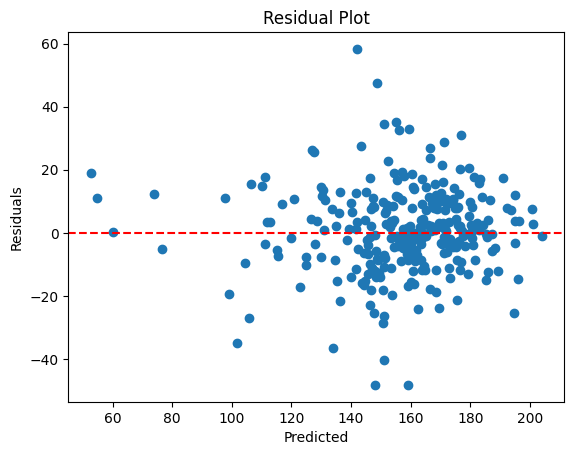

In [137]:
residuals_gb_v2 = y_test - gb_pred_v2
plt.scatter(gb_pred_v2, residuals_gb_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [138]:
mse = mean_squared_error(y_test , gb_pred_v2)
r2 = r2_score(y_test, gb_pred_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 189.65702065962515
R-squared: 0.7524953208195397


## Testing for GB (Unseen data)

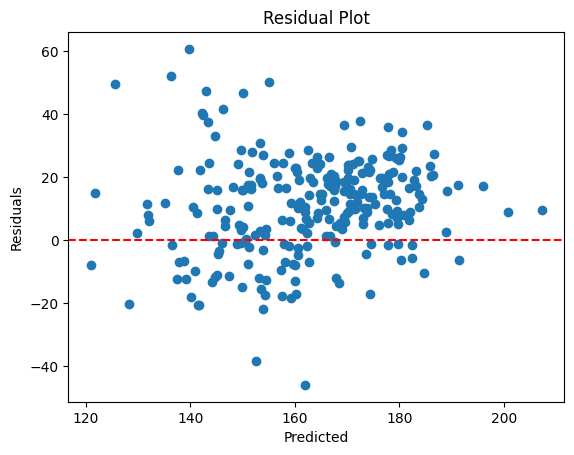

In [139]:
best_predictions_gb_hold_v2 = best_params_gb_v2.predict(X_hold_scaled)

residuals_gb_hold_v2 = y_hold - best_predictions_gb_hold_v2
plt.scatter(best_predictions_gb_hold_v2, residuals_gb_hold_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [140]:
mse = mean_squared_error(y_hold , best_predictions_gb_hold_v2 )
r2 = r2_score(y_hold, best_predictions_gb_hold_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 361.54711423758806
R-squared: 0.3319100244939578


## Relevant Soil Features

In [141]:
relevant_soil = ["Ph1to1h2o_l", "AWS", "Representative_Non-Irrigated_Yield", "ksat_"]

In [144]:
all_soil_features = list(soil_cleaned.columns)

In [147]:
not_relevant_soil_features = list(set(all_soil_features) - set(relevant_soil))

In [149]:
not_relevant_soil_features.remove("County")

In [150]:
'''
X_train_scaled 
X_test_scaled 
X_hold_scaled 
'''

X_train_scaled_v2 = X_train_scaled.drop(columns=not_relevant_soil_features, axis=1)
X_test_scaled_v2 = X_test_scaled.drop(columns=not_relevant_soil_features, axis=1)
X_hold_scaled_v2 = X_hold_scaled.drop(columns=not_relevant_soil_features, axis=1)

## Second GB

In [151]:
# Create a Gradient Boosting regressor
gb_regressor_v2 = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
}

In [152]:
# Perform grid search with 5-fold cross-validation
grid_search_gb_v2 = GridSearchCV(gb_regressor_v2, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#change here
grid_search_gb_v2.fit(X_train_scaled_v2, y_train) 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [153]:
# Make predictions on the testing data using the best model
best_params_gb_v2 = grid_search_gb_v2.best_estimator_
gb_pred_v2 = best_params_gb_v2.predict(X_test_scaled_v2)

best_params_gb_v2

GradientBoostingRegressor(n_estimators=200)

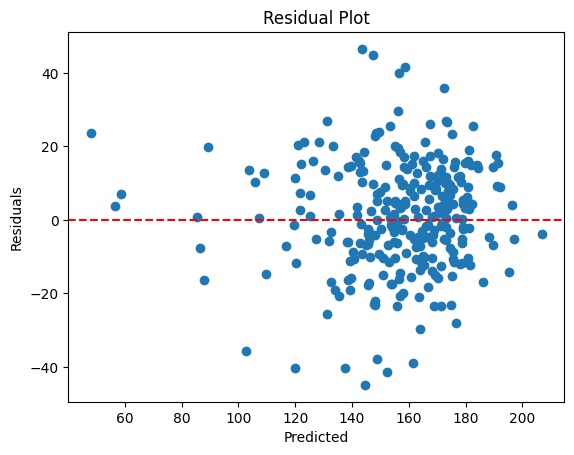

In [154]:
residuals_gb_v2 = y_test - gb_pred_v2
plt.scatter(gb_pred_v2, residuals_gb_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [155]:
mse = mean_squared_error(y_test , gb_pred_v2)
r2 = r2_score(y_test, gb_pred_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 220.06628881381403
R-squared: 0.7128108623563716


## Testing for GB (Unseen data)

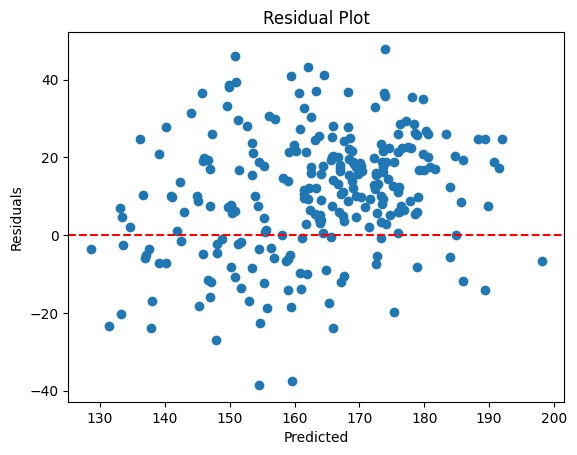

In [156]:
best_predictions_gb_hold_v2 = best_params_gb_v2.predict(X_hold_scaled_v2)

residuals_gb_hold_v2 = y_hold - best_predictions_gb_hold_v2
plt.scatter(best_predictions_gb_hold_v2, residuals_gb_hold_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [157]:
mse = mean_squared_error(y_hold , best_predictions_gb_hold_v2 )
r2 = r2_score(y_hold, best_predictions_gb_hold_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 354.8121362182163
R-squared: 0.3443553493846965


In [158]:
# Get the best estimator from grid search
best_estimator = grid_search_gb_v2.best_estimator_

# Extract feature importance from the best estimator
feature_importance = best_estimator.feature_importances_

# Get the feature names
feature_names = X_train_scaled_v2.columns

# Sort feature importance by importance values in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Print feature importance starting with the highest score
for index in sorted_indices:
    print(f"Feature: {feature_names[index]}, Importance: {feature_importance[index]}")

Feature: EMXT_6, Importance: 0.14576947406553448
Feature: DP10_6, Importance: 0.08603143969817906
Feature: DP01_7, Importance: 0.07669832468381585
Feature: PRCP_6, Importance: 0.062434158805671235
Feature: Representative_Non-Irrigated_Yield, Importance: 0.05833588156891298
Feature: DP01_10, Importance: 0.051637561480104996
Feature: PRCP_5, Importance: 0.04419242974395256
Feature: DP10_7, Importance: 0.039405948686926456
Feature: PRCP_7, Importance: 0.03078528231182575
Feature: DP01_5, Importance: 0.02652215044123848
Feature: EMXT_8, Importance: 0.026076786339137365
Feature: DP01_6, Importance: 0.02185329578839148
Feature: EMXP_5, Importance: 0.019606084253015472
Feature: EMXT_5, Importance: 0.01927721969678163
Feature: DP10_9, Importance: 0.017577438981198623
Feature: DP10_10, Importance: 0.01733000447369085
Feature: AWS, Importance: 0.01604176716340352
Feature: EMXT_4, Importance: 0.015805938664714622
Feature: EMXP_9, Importance: 0.014161982258528237
Feature: DP01_4, Importance: 0.013

In [160]:
# Sort feature names based on sorted indices
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Print the sorted feature names
print(sorted_feature_names)

['EMXT_6', 'DP10_6', 'DP01_7', 'PRCP_6', 'Representative_Non-Irrigated_Yield', 'DP01_10', 'PRCP_5', 'DP10_7', 'PRCP_7', 'DP01_5', 'EMXT_8', 'DP01_6', 'EMXP_5', 'EMXT_5', 'DP10_9', 'DP10_10', 'AWS', 'EMXT_4', 'EMXP_9', 'DP01_4', 'DP01_9', 'TAVG_5', 'EMXT_7', 'DP10_5', 'DT32_4', 'TAVG_4', 'EMXP_8', 'PRCP_9', 'TAVG_10', 'DP01_8', 'PRCP_10', 'DP10_8', 'EMXP_10', 'PRCP_4', 'TAVG_6', 'EMXP_4', 'EMXP_6', 'TAVG_9', 'DX90_8', 'EMXT_10', 'EMXP_7', 'TAVG_7', 'PRCP_8', 'DT32_10', 'TAVG_8', 'DP10_4', 'DX90_7', 'DX90_5', 'DX90_9', 'EMXT_9', 'DX90_6', 'DT32_5']


In [193]:
first_25_elements = sorted_feature_names[:45]

In [194]:
'''

X_train_scaled_v2 = X_train_scaled.drop(columns=not_relevant_soil_features, axis=1)
X_test_scaled_v2 = X_test_scaled.drop(columns=not_relevant_soil_features, axis=1)
X_hold_scaled_v2 = X_hold_scaled.drop(columns=not_relevant_soil_features, axis=1)

'''

# Keep the 25 features based on the score
X_train_scaled_v3 = X_train_scaled_v2.loc[:, first_25_elements]
X_test_scaled_v3 = X_test_scaled_v2.loc[:, first_25_elements]
X_hold_scaled_v3 = X_hold_scaled_v2.loc[:, first_25_elements]

In [195]:
X_train_scaled_v3

,EMXT_6,DP10_6,DP01_7,PRCP_6,Representative_Non-Irrigated_Yield,DP01_10,PRCP_5,DP10_7,PRCP_7,DP01_5,...,EMXP_4,EMXP_6,TAVG_9,DX90_8,EMXT_10,EMXP_7,TAVG_7,PRCP_8,DT32_10,TAVG_8
0,0.086477,-0.393665,-0.871345,-0.471183,-0.136290,0.285714,-1.199468,-0.627451,-0.712393,-1.644587,...,-0.648649,-0.639832,0.595983,3.807692,1.781224,-0.793837,-0.809177,0.295567,0.00,1.828019
1,-1.289569,0.393665,-0.435407,0.549711,-0.317552,0.317293,-0.443678,-1.235294,-0.876638,-0.152341,...,0.442607,0.629164,-0.580007,-0.207692,-0.490401,-0.754275,-1.389385,-0.014095,1.75,-1.238081
2,-0.538999,-0.099548,-0.052632,0.296011,0.864450,0.385714,-1.063547,-0.441176,-0.261875,-0.884422,...,1.611685,0.450684,0.930072,-0.807692,0.608772,-0.222535,-0.422372,0.634191,4.00,-0.054674
3,-0.254692,-0.298643,-0.184211,-0.181461,-0.180840,0.219048,0.402682,0.176471,1.026369,0.482412,...,-0.008943,0.297336,-0.740369,1.500000,0.860012,1.873975,1.382718,1.211159,1.00,1.828019
4,-0.087612,1.941176,-0.052632,2.521865,-0.003557,-0.580952,-0.575972,0.000000,-0.059857,0.000000,...,0.005962,1.098632,-0.043369,0.000000,0.016758,0.278754,-0.073523,-0.176669,0.00,-0.056130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,-1.505642,0.000000,0.000000,0.004490,1.641991,0.085714,0.000000,0.000000,-0.016995,0.048241,...,0.000000,0.000000,-1.475363,-0.807692,-1.233652,-0.005020,-0.486840,0.001083,0.50,0.079804
1135,-0.087612,-0.447964,-0.052632,0.496563,0.963784,0.485714,-0.118829,-0.176471,0.331320,-0.482412,...,0.512719,1.394528,-0.043369,0.000000,0.016758,0.147576,-0.073523,-0.487399,0.00,-0.056130
1136,-0.087612,-0.895928,0.078947,-0.785773,0.517003,-0.214286,1.726163,0.705882,-0.261536,-0.120603,...,0.029809,-0.437005,-0.043369,0.000000,0.016758,-0.660576,-0.073523,0.089374,0.00,-0.056130
1137,0.086477,0.398190,0.506579,1.001061,-0.136487,0.942857,-0.220963,0.264706,0.632485,0.482412,...,0.966812,1.028798,1.464613,0.807692,-0.103073,1.761537,0.415705,-0.841517,0.00,1.021151


## Third GB

In [196]:
# Create a Gradient Boosting regressor
gb_regressor_v2 = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
}

In [197]:
# Perform grid search with 5-fold cross-validation
grid_search_gb_v2 = GridSearchCV(gb_regressor_v2, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#change here
grid_search_gb_v2.fit(X_train_scaled_v3, y_train) 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [198]:
# Make predictions on the testing data using the best model
best_params_gb_v2 = grid_search_gb_v2.best_estimator_
gb_pred_v2 = best_params_gb_v2.predict(X_test_scaled_v3)

best_params_gb_v2

GradientBoostingRegressor(max_depth=5, n_estimators=200)

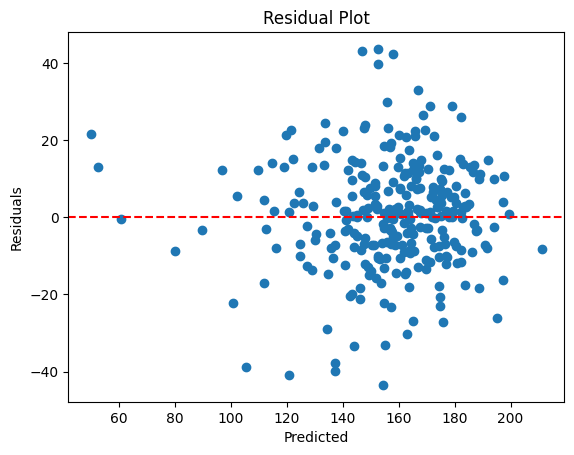

In [199]:
residuals_gb_v2 = y_test - gb_pred_v2
plt.scatter(gb_pred_v2, residuals_gb_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [200]:
mse = mean_squared_error(y_test , gb_pred_v2)
r2 = r2_score(y_test, gb_pred_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 201.40422839902172
R-squared: 0.7371650742898128


## Testing for GB_v2 (Unseen data)

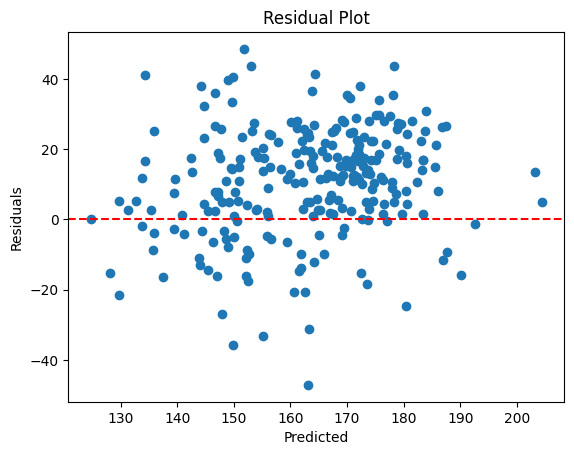

In [201]:
best_predictions_gb_hold_v2 = best_params_gb_v2.predict(X_hold_scaled_v3)

residuals_gb_hold_v2 = y_hold - best_predictions_gb_hold_v2
plt.scatter(best_predictions_gb_hold_v2, residuals_gb_hold_v2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [202]:
mse = mean_squared_error(y_hold , best_predictions_gb_hold_v2 )
r2 = r2_score(y_hold, best_predictions_gb_hold_v2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 360.03766075813206
R-squared: 0.33469928956731854
